
## Import packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


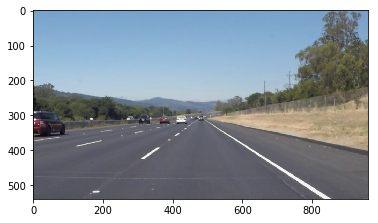

In [2]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Helper Functions

In [3]:
import math

def colormask(img):
    
    red_threshold = 180
    green_threshold = 180
    blue_threshold = 100
    ######

    rgb_threshold = [red_threshold, green_threshold, blue_threshold]

    # Do a boolean or with the "|" character to identify
    # pixels below the thresholds
    thresholds = (img[:,:,0] < rgb_threshold[0]) \
            | (img[:,:,1] < rgb_threshold[1]) \
            | (img[:,:,2] < rgb_threshold[2])
    img[thresholds] = [0,0,0]

    # Display the image                 
    #plt.imshow(image_copy)    
  
    
    return img
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
    

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
      
  
    
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    
    
    
  
    
    
    
    
    
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    
    # IA Enhancements...
    # Group lines for left side and right side removing any noise
    # Average left lines, Avergae right lines
    # merge to create two lines as a single vector to pass to the function before
    
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

## Test images

In [4]:
import os
os.listdir("test_images/")

['solidWhiteCurve-Lined.jpg',
 'solidWhiteCurve.jpg',
 'solidWhiteRight-Lined.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve-Lined.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2-Lined.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft-Lined.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch-Lined.jpg',
 'whiteCarLaneSwitch.jpg']

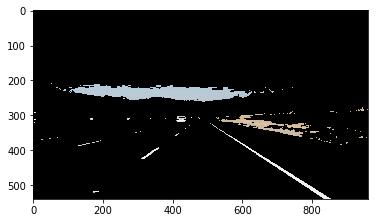

In [5]:
image = mpimg.imread('test_images/solidWhiteRight.jpg')
#image = mpimg.imread('test_images/solidWhiteCurve.jpg')
#image = mpimg.imread('test_images/solidYellowCurve.jpg')
#image = mpimg.imread('test_images/solidYellowCurve2.jpg')
#image = mpimg.imread('test_images/solidYellowLeft.jpg')
#image = mpimg.imread('test_images/whiteCarLaneSwitch.jpg')


ysize = image.shape[0]
xsize = image.shape[1]
image_copy = np.copy(image)

# TODO: Calculate these dynamically
left_bottom = [0, 539]
right_bottom = [xsize, 539]
apex_left = [425, 330]
apex_right = [525, 330]

#vertices = np.array([[0,539],[475,320],[900,539]])
vertices = [np.array([left_bottom,apex_left, apex_right,right_bottom])]


image_copy = colormask(image_copy)

# Display the image                 
plt.imshow(image_copy)








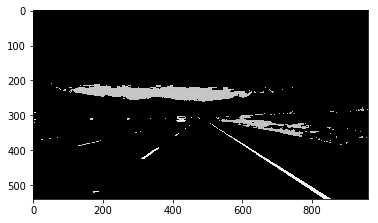

In [6]:
# Pre process so it is suitable for canny edge detection
# grey_image = grayscale(masked_image)
grey_image = grayscale(image_copy)

plt.imshow(grey_image, cmap='gray')

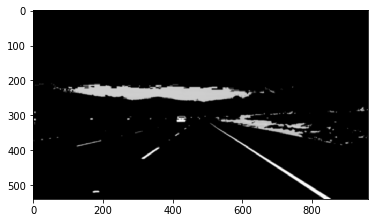

In [7]:

kernel_size = 7 # 5

gaussian_image = gaussian_blur(grey_image, kernel_size)


plt.imshow(gaussian_image, cmap='gray')

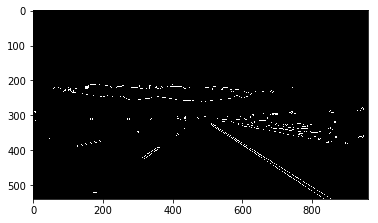

In [8]:
# Apply the canny edge detection

low_threshold = 150   #  50  #150
high_threshold = 200 # 150   #200
canny_image = canny(gaussian_image, low_threshold, high_threshold)

plt.imshow(canny_image, cmap='gray')

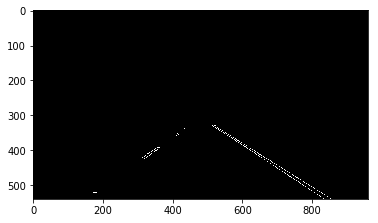

In [9]:
masked_image = region_of_interest(canny_image, vertices)

plt.imshow(masked_image, cmap='gray')

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
xsize =  960
ysize =  540


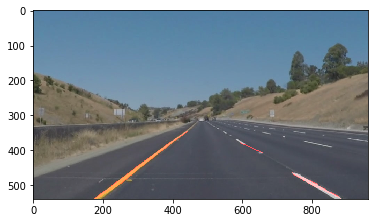

In [10]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images directory.

#reading in an image
#image = mpimg.imread('test_images/solidWhiteRight.jpg')
#image = mpimg.imread('test_images/solidWhiteCurve.jpg')
#image = mpimg.imread('test_images/solidYellowCurve.jpg')
#image = mpimg.imread('test_images/solidYellowCurve2.jpg')
#image = mpimg.imread('test_images/solidYellowLeft.jpg')
image = mpimg.imread('test_images/whiteCarLaneSwitch.jpg')

#printing out some stats
print('This image is:', type(image), 'with dimensions:', image.shape)

###########################################################################################################
# Mask the area to shorten the search space                                                               #
###########################################################################################################
# Have to move the mask towards the end of the pipeline as it has the effect of creating an artifical line

# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
image_copy = np.copy(image)

print("xsize = ", xsize)
print("ysize = ", ysize)

# TODO: Calculate these dynamically
left_bottom = [0, 539]
right_bottom = [xsize, 539]
apex_left = [425, 330]
apex_right = [525, 330]

#vertices = np.array([[0,539],[475,320],[900,539]])
vertices = [np.array([left_bottom,apex_left, apex_right,right_bottom])]

#masked_image = region_of_interest(image_copy, vertices)
#plt.imshow(masked_image)


image_copy = colormask(image_copy)

# Display the image                 
# plt.imshow(image_copy)


# Pre process so it is suitable for canny edge detection
# grey_image = grayscale(masked_image)
grey_image = grayscale(image_copy)

# plt.imshow(grey_image, cmap='gray')

kernel_size = 7 # 5

gaussian_image = gaussian_blur(grey_image, kernel_size)


#plt.imshow(gaussian_image, cmap='gray')

# Apply the canny edge detection

low_threshold = 150   #  50  #150 
high_threshold = 200 # 150   #200
canny_image = canny(gaussian_image, low_threshold, high_threshold)

#plt.imshow(canny_image, cmap='gray')

masked_image = region_of_interest(canny_image, vertices)

#plt.imshow(masked_image, cmap='gray')






# Apply the Hough Transform

rho = 2           #  2
theta = 1        #  1
threshold = 25    # 15   # 35
min_line_len = 60 # 20   # 20  #40
max_line_gap = 200 # 30   # 60  #20


#hough_image = hough_lines(canny_image, rho, theta, threshold, min_line_len, max_line_gap)
hough_image = hough_lines(masked_image, rho, theta, threshold, min_line_len, max_line_gap)


#plt.imshow(hough_image)

# Draw the lines

image_tmp = np.copy(image)
#draw_lines(image_tmp, hough_image)

testing = weighted_img(hough_image, image_tmp)

# Show final image
plt.imshow(testing)

# Save the images



#printing out some stats and plotting

# plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')


## Video pipeline

In [11]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [12]:
# Create a rolling average for the line here

left_lane_min_x_roll_av = []
left_lane_max_x_roll_av = []

right_lane_min_x_roll_av = []
right_lane_max_x_roll_av = []

#sample_count = 0;

def reset_rolling_average():
    global left_lane_min_x_roll_av
    global left_lane_max_x_roll_av
    global right_lane_min_x_roll_av
    global right_lane_max_x_roll_av
    
    left_lane_min_x_roll_av = []
    left_lane_max_x_roll_av = []

    right_lane_min_x_roll_av = []
    right_lane_max_x_roll_av = []

def remove_outliers(data_to_clean):
    mean = np.mean(data_to_clean)
    std = np.std(data_to_clean, axis=0)
    #print(mean, std)
    cleanData = [];
    for val in data_to_clean:
        if ((val-mean)*(val-mean) <= (std)*(std)):
            # keep it
            cleanData.append(val)
    
    return cleanData
    #d = np.abs(data - np.median(data))
    #mdev = np.median(d)
    #s = d/(mdev if mdev else 1.)
    #return data[s<m]
    #return data[abs(data - np.mean(data)) < m * np.std(data)]

def calculate_rolling_average(l_min_x, l_max_x, r_min_x, r_max_x):
    global left_lane_min_x_roll_av
    global left_lane_max_x_roll_av
    global right_lane_min_x_roll_av
    global right_lane_max_x_roll_av
    #np.extend(left_lane_min_x_roll_av, l_min_x)
    #np.extend(left_lane_max_x_roll_av, l_max_x)
    #np.extend(right_lane_min_x_roll_av, r_min_x)
    #np.extend(right_lane_max_x_roll_av, r_max_x)    
   # while (len(left_lane_min_x_roll_av) < 19):
   #     left_lane_min_x_roll_av.append(l_min_x)
   #     left_lane_max_x_roll_av.append(l_max_x)
   #     right_lane_min_x_roll_av.append(r_min_x)
   #     right_lane_max_x_roll_av.append(r_max_x)  
        
    left_lane_min_x_roll_av.append(l_min_x)
    left_lane_max_x_roll_av.append(l_max_x)
    right_lane_min_x_roll_av.append(r_min_x)
    right_lane_max_x_roll_av.append(r_max_x)          
    
    if (len(left_lane_min_x_roll_av) > 60): #40 20
        #left_lane_min_x_roll_av = np.delete(left_lane_min_x_roll_av,0)
        #left_lane_max_x_roll_av = np.delete(left_lane_max_x_roll_av,0)
        #right_lane_min_x_roll_av = np.delete(right_lane_min_x_roll_av,0)
        #right_lane_max_x_roll_av = np.delete(right_lane_max_x_roll_av,0)        
        #left_lane_min_x_roll_av = left_lane_min_x_roll_av.pop(0)
        #left_lane_max_x_roll_av = left_lane_max_x_roll_av.pop(0)
        #right_lane_min_x_roll_av = right_lane_min_x_roll_av.pop(0)
        #right_lane_max_x_roll_av = right_lane_max_x_roll_av.pop(0)      
        left_lane_min_x_roll_av.pop(0)
        left_lane_max_x_roll_av.pop(0)
        right_lane_min_x_roll_av.pop(0)
        right_lane_max_x_roll_av.pop(0)           
    return 

In [27]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    global left_lane_min_x_roll_av
    global left_lane_max_x_roll_av
    global right_lane_min_x_roll_av
    global right_lane_max_x_roll_av    

    # Pull out the x and y sizes and make a copy of the image
    ysize = image.shape[0]
    xsize = image.shape[1]
    image_copy = np.copy(image)

    # TODO: Calculate these dynamically
    #left_bottom = [100, ysize] #539
    #right_bottom = [xsize-100, ysize] #539
    #apex = [475, 270]#270
    
    left_bottom = [1, ysize]
    right_bottom = [xsize, ysize]
    apex_left = [int(xsize*0.45), int(ysize*0.6)]   # 330 of 540 is 61% so 3/5 seems reasonable, 425 of 960 is 44.3%
    apex_right = [int(xsize*0.55), int(ysize*0.6)]    # 525 of 960 is 54.7%

    vertices = [np.array([left_bottom,apex_left,apex_right,right_bottom])]

    # Pre process so it is suitable for canny edge detection
    grey_image = grayscale(image_copy)

    kernel_size = 5 # 5
    gaussian_image = gaussian_blur(grey_image, kernel_size)

    # Apply the canny edge detection
    low_threshold = 150   #  50  #150    # 50
    high_threshold = 200 # 150   #200   # 150
    canny_image = canny(gaussian_image, low_threshold, high_threshold)

    # Just look at the target region
    masked_image = region_of_interest(canny_image, vertices)

    #plt.imshow(masked_image, cmap='gray')

    # Apply the Hough Transform

    #                  # Previous values
    rho = 2            #  2               # 2
    theta = 1          #  1               # 1
    threshold = 30     # 15   # 35        # 25
    min_line_len = 40  # 20   # 20  #40   # 20
    max_line_gap = 150 # 30   # 60  #20   # 100
    # hough_image = hough_lines(masked_image, rho, theta, threshold, min_line_len, max_line_gap)
    
    # IA Enhancements...
    # Group lines for left side and right side removing any noise
    # Average left lines, Avergae right lines
    # merge to create two lines as a single vector to pass to the function before
    lines = cv2.HoughLinesP(masked_image, rho, theta, threshold, np.array([]), min_line_len, max_line_gap)
    
    #cv2.partition
    
    color_red=[255, 0, 0]
    color_blue=[0, 0, 255]
    thickness=7
    
    line_img = np.zeros((masked_image.shape[0], masked_image.shape[1], 3), dtype=np.uint8)
    
    #left_lane_min_x = 999
    #left_lane_max_x = 0
    #left_lane_min_y = 999
    #left_lane_max_y = 0
    #right_lane_min_x = 999
    #right_lane_max_x = 0
    #right_lane_min_y = 999
    #right_lane_max_y = 0
    
    av_slope_left = []
    av_intercept_left = []
    av_slope_right = []
    av_intercept_right = []
    
    left_lane_x = []
    left_lane_y = []
    right_lane_x = []
    right_lane_y = []
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            my_slope = ((y2-y1)/(x2-x1))
            my_intercept = y1 - (my_slope*x1)
            
            if my_slope == np.NaN:
                continue                           
            
            #print("my_slope = ",my_slope)
            if (my_slope > 0.45) & (my_slope < 0.55): # if (my_slope > 0.4) & (my_slope < 0.6):
                #right line     
                #print("right my_slope = ",my_slope)
                av_slope_right.append(my_slope)
                av_intercept_right.append(my_intercept)
                
                right_lane_x.extend([x1,x2])
                right_lane_y.extend([y1,y2])
                
                #if (right_lane_min_y > y1) & (y1 > 900):
                #    right_lane_min_y = y1
                #if (right_lane_min_x > x1) & (x1 > 100):
                #    right_lane_min_x = x1
                #if (right_lane_max_y < y2) & (y2 > 900):
                #    right_lane_max_y = y2
                #if (right_lane_max_x < x2) & (x2 < 100):
                #    right_lane_max_x = x2                    
                
            elif (my_slope > -0.7) & (my_slope < -0.5): # if (my_slope > -0.7) & (my_slope < -0.5):
                #left line    
                #print("left my_slope = ",my_slope)
                av_slope_left.append(my_slope)
                av_intercept_left.append(my_intercept)
                
                left_lane_x.extend([x1,x2])
                left_lane_y.extend([y1,y2])                
                
                #if (left_lane_min_y > y1) & (y1 > 900):
                #    left_lane_min_y = y1
                #if (left_lane_min_x > x1) & (x1 > 100):
                #    left_lane_min_x = x1
                #if (left_lane_max_y < y2) & (y2 < 900):
                #    left_lane_max_y = y2
                #if (left_lane_max_x < x2) & (x2 > 100):
                #    left_lane_max_x = x2    
                
  #  print(len(av_slope_left))
 #   print(len(av_slope_right))

    # Remove outliers
    av_slope_left = remove_outliers(av_slope_left)
    av_slope_right = remove_outliers(av_slope_right)
    av_intercept_left = remove_outliers(av_intercept_left)
    av_intercept_right = remove_outliers(av_intercept_right)
    
  #  print(len(av_slope_left))
#    print(len(av_slope_right))
    
   # print("median_intercept_left = ",median_intercept_left, "median_slope_left = ", median_slope_left)
    
    
   
    
    
        
    # Find highest XY and smallest XY for each line + slope
    #cv2.line(line_img, (200, 500), (400, 300), color, thickness)
    #cv2.line(line_img, (800, 500), (550, 300), color, thickness)
    
    # Left lane
  #  cv2.line(line_img, (left_lane_min_x, 600), (left_lane_max_x, 300), color, thickness)
    # Right lane
   # cv2.line(line_img, (right_lane_min_x, 600), (right_lane_max_x, 300), color, thickness)

    left_lane_min_y = int(ysize*0.6)
    left_lane_max_y = ysize

    right_lane_min_y = int(ysize*0.6)
    right_lane_max_y = ysize

    if (len(av_slope_right) > 1) & (len(av_slope_left) > 1):
    
        median_slope_right = np.mean(av_slope_right)
        median_intercept_right = np.mean(av_intercept_right)

        median_slope_left = np.mean(av_slope_left)
        median_intercept_left = np.mean(av_intercept_left)   
        
        
        # Hack
       #median_slope_right = median_slope_right + 0.02

        #left_lane_min_y = int(ysize*0.6)
        #left_lane_max_y = ysize

        #right_lane_min_y = int(ysize*0.6)
        #right_lane_max_y = ysize

       # print("median_intercept_left = ",median_intercept_left, "median_slope_left = ", median_slope_left)
      #  print("median_intercept_right = ",median_intercept_right, "median_slope_right = ", median_slope_right)

        # y = mx + b
        # (y-b)/m = x
        left_lane_min_x = (left_lane_min_y - median_intercept_left) / median_slope_left
        left_lane_max_x = (left_lane_max_y - median_intercept_left) / median_slope_left

        right_lane_min_x = (right_lane_min_y - median_intercept_right) / median_slope_right
        right_lane_max_x = (right_lane_max_y - median_intercept_right) / median_slope_right
        
         # Hack
        right_lane_min_x = right_lane_min_x + 50 # 40
        right_lane_max_x = right_lane_max_x - 35 # 25
        
        
        # Rolling av
        
        calculate_rolling_average(left_lane_min_x, left_lane_max_x, right_lane_min_x, right_lane_max_x)
        
    if (len(left_lane_min_x_roll_av) > 0):
        
        left_lane_min_x = int(np.mean(left_lane_min_x_roll_av))
        left_lane_max_x = int(np.mean(left_lane_max_x_roll_av))

        right_lane_min_x = int(np.mean(right_lane_min_x_roll_av))
        right_lane_max_x = int(np.mean(right_lane_max_x_roll_av))

            # rolling av

           # print(len(left_lane_min_x_roll_av), left_lane_min_x, left_lane_max_x, right_lane_min_x, right_lane_max_x)


        # Left lane
        cv2.line(line_img, (left_lane_min_x, left_lane_min_y), (left_lane_max_x, left_lane_max_y), color_blue, thickness)
        # Right lane
        cv2.line(line_img, (right_lane_min_x, right_lane_min_y), (right_lane_max_x, right_lane_max_y), color_blue, thickness)            

        
        
#        left_lane_points = np.poly1d(np.polyfit(left_lane_y, left_lane_x, 3))
#        right_lane_points = np.poly1d(np.polyfit(right_lane_y, right_lane_x, 3))
        
#        left_lane_min_x = int(left_lane_points(left_lane_min_y))
#        left_lane_max_x = int(left_lane_points(left_lane_max_y))

#        right_lane_min_x = int(right_lane_points(right_lane_min_y))
#        right_lane_max_x = int(right_lane_points(right_lane_max_y))
        
        
        #print("left_lane_min_x = ",left_lane_min_x, "left_lane_max_x = ", left_lane_max_x)
        #print("right_lane_min_x = ",right_lane_min_x, "right_lane_max_x = ", right_lane_max_x)
        
        
        
        
        
        
        
       # left_lane_min_x_roll_av = np.array()
        #left_lane_max_x_roll_av = np.array()

       #right_lane_min_x_roll_av = np.array()
       # right_lane_max_x_roll_av = np.array()

       # sample_count = 0;

      #  calculate_rolling_average(left_lane_min_x, left_lane_max_x, right_lane_min_x, right_lane_max_x)
        
        
      #  left_lane_min_x = int(np.mean(left_lane_min_x_roll_av))
      #  left_lane_max_x = int(np.mean(left_lane_max_x_roll_av))

      #  right_lane_min_x = int(np.mean(right_lane_min_x_roll_av))
      #  right_lane_max_x = int(np.mean(right_lane_max_x_roll_av))
        
        
        
        
        
        
        


        # Left lane
     #   cv2.line(line_img, (left_lane_min_x, left_lane_min_y), (left_lane_max_x, left_lane_max_y), color_red, thickness)
        # Right lane
    #   cv2.line(line_img, (right_lane_min_x, right_lane_min_y), (right_lane_max_x, right_lane_max_y), color_red, thickness)    


   #  cv2.fitLine(np.array(lines, dtype=np.int32), cv2.DIST_L2,0,0.01,0.01)
    
    
   # left_line = np.polyfit(left_lines_x, left_lines_y, 3)
    #print(left_line)
    
  #  cv2.fitLine(np.array(points, dtype=np.int32), cv2.DIST_L2,0,0.01,0.01)
    
    #for x1,y1,x2,y2 in left_line:
#        cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)
    #cv2.line(line_img, (left_line.x1, left_line.y1), (left_line.x2, left_line.y2), color, thickness)
    
    # IA Enhancements...
    # Group lines for left side and right side removing any noise
    # Average left lines, Avergae right lines
    # merge to create two lines as a single vector to pass to the function before
    
    
   # draw_lines(line_img, lines)
  #  return line_img
    
    
    
    
    
    
    
    

    # Draw the lines

    image_tmp = np.copy(image)
    #draw_lines(image_tmp, hough_image)

    result = weighted_img(line_img, image_tmp)

    return result



# For alternate approaches
#def process_image_2(image):

## Testing the lines

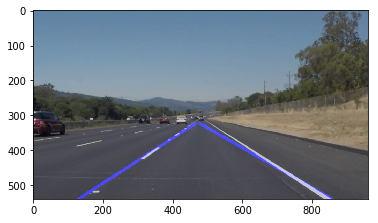

In [28]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
#image = mpimg.imread('test_images/solidWhiteCurve.jpg')
#image = mpimg.imread('test_images/solidYellowCurve.jpg')
#image = mpimg.imread('test_images/solidYellowCurve2.jpg')
#image = mpimg.imread('test_images/solidYellowLeft.jpg')
#image = mpimg.imread('test_images/whiteCarLaneSwitch.jpg')

reset_rolling_average()

image_copy = np.copy(image)

image_copy = process_image(image_copy)

plt.imshow(image_copy)

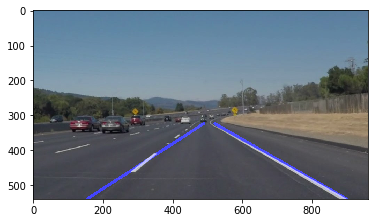

In [29]:
#image = mpimg.imread('test_images/solidWhiteRight.jpg')
image = mpimg.imread('test_images/solidWhiteCurve.jpg')
#image = mpimg.imread('test_images/solidYellowCurve.jpg')
#image = mpimg.imread('test_images/solidYellowCurve2.jpg')
#image = mpimg.imread('test_images/solidYellowLeft.jpg')
#image = mpimg.imread('test_images/whiteCarLaneSwitch.jpg')

reset_rolling_average()

image_copy = np.copy(image)

image_copy = process_image(image_copy)

plt.imshow(image_copy)

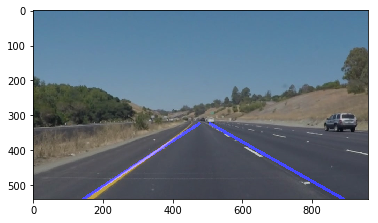

In [30]:
#image = mpimg.imread('test_images/solidWhiteRight.jpg')
#image = mpimg.imread('test_images/solidWhiteCurve.jpg')
image = mpimg.imread('test_images/solidYellowCurve.jpg')
#image = mpimg.imread('test_images/solidYellowCurve2.jpg')
#image = mpimg.imread('test_images/solidYellowLeft.jpg')
#image = mpimg.imread('test_images/whiteCarLaneSwitch.jpg')

reset_rolling_average()

image_copy = np.copy(image)

image_copy = process_image(image_copy)

plt.imshow(image_copy)

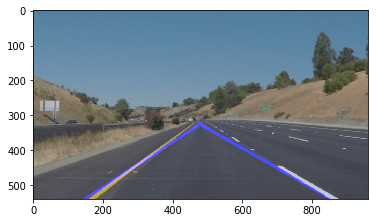

In [31]:
#image = mpimg.imread('test_images/solidWhiteRight.jpg')
#image = mpimg.imread('test_images/solidWhiteCurve.jpg')
#image = mpimg.imread('test_images/solidYellowCurve.jpg')
image = mpimg.imread('test_images/solidYellowCurve2.jpg')
#image = mpimg.imread('test_images/solidYellowLeft.jpg')
#image = mpimg.imread('test_images/whiteCarLaneSwitch.jpg')

reset_rolling_average()

image_copy = np.copy(image)

image_copy = process_image(image_copy)

plt.imshow(image_copy)

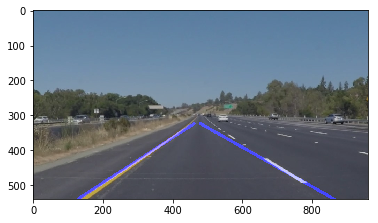

In [32]:
#image = mpimg.imread('test_images/solidWhiteRight.jpg')
#image = mpimg.imread('test_images/solidWhiteCurve.jpg')
#image = mpimg.imread('test_images/solidYellowCurve.jpg')
#image = mpimg.imread('test_images/solidYellowCurve2.jpg')
image = mpimg.imread('test_images/solidYellowLeft.jpg')
#image = mpimg.imread('test_images/whiteCarLaneSwitch.jpg')

reset_rolling_average()

image_copy = np.copy(image)

image_copy = process_image(image_copy)

plt.imshow(image_copy)

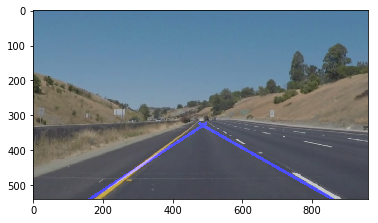

In [33]:
#image = mpimg.imread('test_images/solidWhiteRight.jpg')
#image = mpimg.imread('test_images/solidWhiteCurve.jpg')
#image = mpimg.imread('test_images/solidYellowCurve.jpg')
#image = mpimg.imread('test_images/solidYellowCurve2.jpg')
#image = mpimg.imread('test_images/solidYellowLeft.jpg')
image = mpimg.imread('test_images/whiteCarLaneSwitch.jpg')

reset_rolling_average()

image_copy = np.copy(image)

image_copy = process_image(image_copy)

plt.imshow(image_copy)

In [34]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)

reset_rolling_average()

clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


100%|██████████████████████████████████████████████████████████████████████████████▋| 221/222 [00:02<00:00, 100.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

Wall time: 2.49 s


In [35]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [36]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)

reset_rolling_average()

clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|██████████████████████████████████████████████████████████████████████████████▉| 681/682 [00:06<00:00, 101.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

Wall time: 6.97 s


In [37]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

In [38]:
## Optional Challenge

In [39]:
challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)

reset_rolling_average()

clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/challenge.mp4
[MoviePy] Writing video test_videos_output/challenge.mp4


100%|████████████████████████████████████████████████████████████████████████████████| 251/251 [00:04<00:00, 50.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/challenge.mp4 

Wall time: 5.51 s


In [40]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))